# Use case-3 : Predict Customer Sentiment

**Project Objective:The main aim of this project is to clasify customer sentiments:**

    -- POSITIVE SENTIMENT
    -- NEGATIVE SENTIMENT
    -- NEUTRAL SENTIMENT

**Lifecycle In A Data Science Projects**

    -- Data Analysis
    -- Feature Engineering
    -- Feature Selection
    -- Model Building
    -- Model Deployment

 **Breakdown of this notebook:**
 
    -- Loading the dataset: Load the data and import the libraries.
    -- Data Preprocessing:
        a. Analysing missing data.
        b. Balancing the data.
        c. Removing redundant columns.
    -- Visualising and counting sentiments of tweets for each airline.
    -- Wordcloud plots for positive and negative tweets to visualise most frequent words for each.
    -- Analysing the reasons for negative tweets for each airline.
    -- Visualising negative tweet-sentiment relationship with dates.
    -- Predicting the tweet sentiments with tweet text data with:
        a. Decision Tree Classifier
        b. Random Forest Classifier
    -- Calculating accuracies, plotting the confusion matrix and comparing the models.



# Data Analysis

In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
import re

# plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# nlp
import tweepy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize

# algorithms
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/shritid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shritid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# loading data
airline_data_df = pd.read_csv(r"Usecase3_Dataset.csv")

In [4]:
airline_data_df

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,American,@AmericanAir Please bring American Airlines to...
14638,negative,American,"@AmericanAir you have my money, you change my ..."


# EDA - Exploratory Data Analysis and Data Preprocessing

In [5]:
airline_data_df.shape

(14640, 3)

In [6]:
airline_data_df.columns

Index(['airline_sentiment', 'airline', 'text'], dtype='object')

In [7]:
# storing the sentiment in a variable.
AIRLINE_SENTIMENT = 'airline_sentiment'

In [8]:
# Checking the various types of sentiments in data
airline_data_df[AIRLINE_SENTIMENT].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [9]:
# Checking the % distribution of the sentiments in data set
airline_data_df[AIRLINE_SENTIMENT].value_counts()/len(airline_data_df)*100

negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64

In [10]:
# We can see the data is unbalanced. Majority of data is for negative class

In [11]:
#total cells with missing values
airline_data_df.isnull().sum()

airline_sentiment    0
airline              0
text                 0
dtype: int64

# vizualization of data

**Airline sentiments for each airline:**

    Step1: Calculating the total number of tweets for each airline (pie chart).
    Step2: Vizualizing the sentiments distribution airline wise (barcharts).
    Step3: Vizualize frequently used words in Negative and Positive tweets. (wordcloud)
    Step4: Calculating the frequency count for postive tweets
  This will give us a clearer idea about the airline sentiments , airlines relationship

In [12]:
# Finding out the airline operator names. 
airline_data_df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [13]:
# Finding out the count of tweets for each airline in descending order.
print("Tweets distribution for each airline: ")
airline_distribution = airline_data_df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False)
airline_distribution

Tweets distribution for each airline: 


airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64

# Pie Chart
-- to vizualize the % age distribution of tweets for each airline

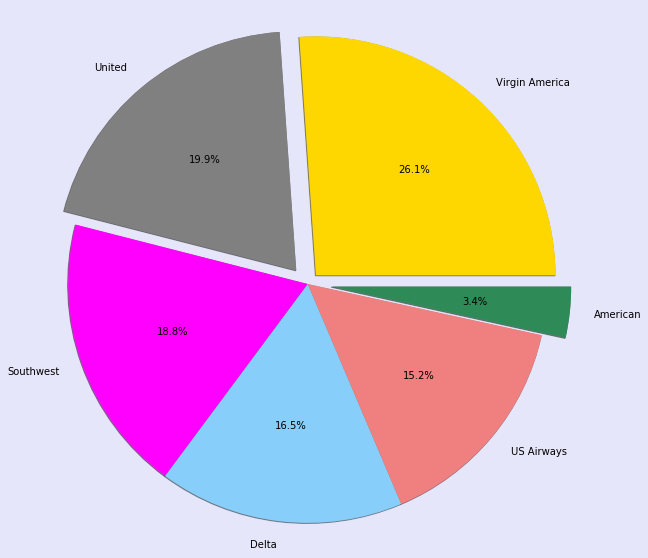

In [14]:
# Data to plot stored in variables
labels = 'Virgin America', 'United', 'Southwest', 'Delta', 'US Airways','American'
colors = ['gold', 'grey', 'magenta', 'lightskyblue', 'lightcoral', 'seagreen']
explode = (0.4, 0.6, 0, 0, 0 ,0.8)  # explode 1st,2nd and last slice

# Pie - Plot
plt.figure(1,figsize=(10, 10),facecolor='lavender',edgecolor='brown')
plt.pie(airline_distribution,explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, frame=False, radius=8)

plt.axis('equal')
plt.show()

# Bar Chart
-- Distribution of each sentiment(negative, positive, neutral) in each airline

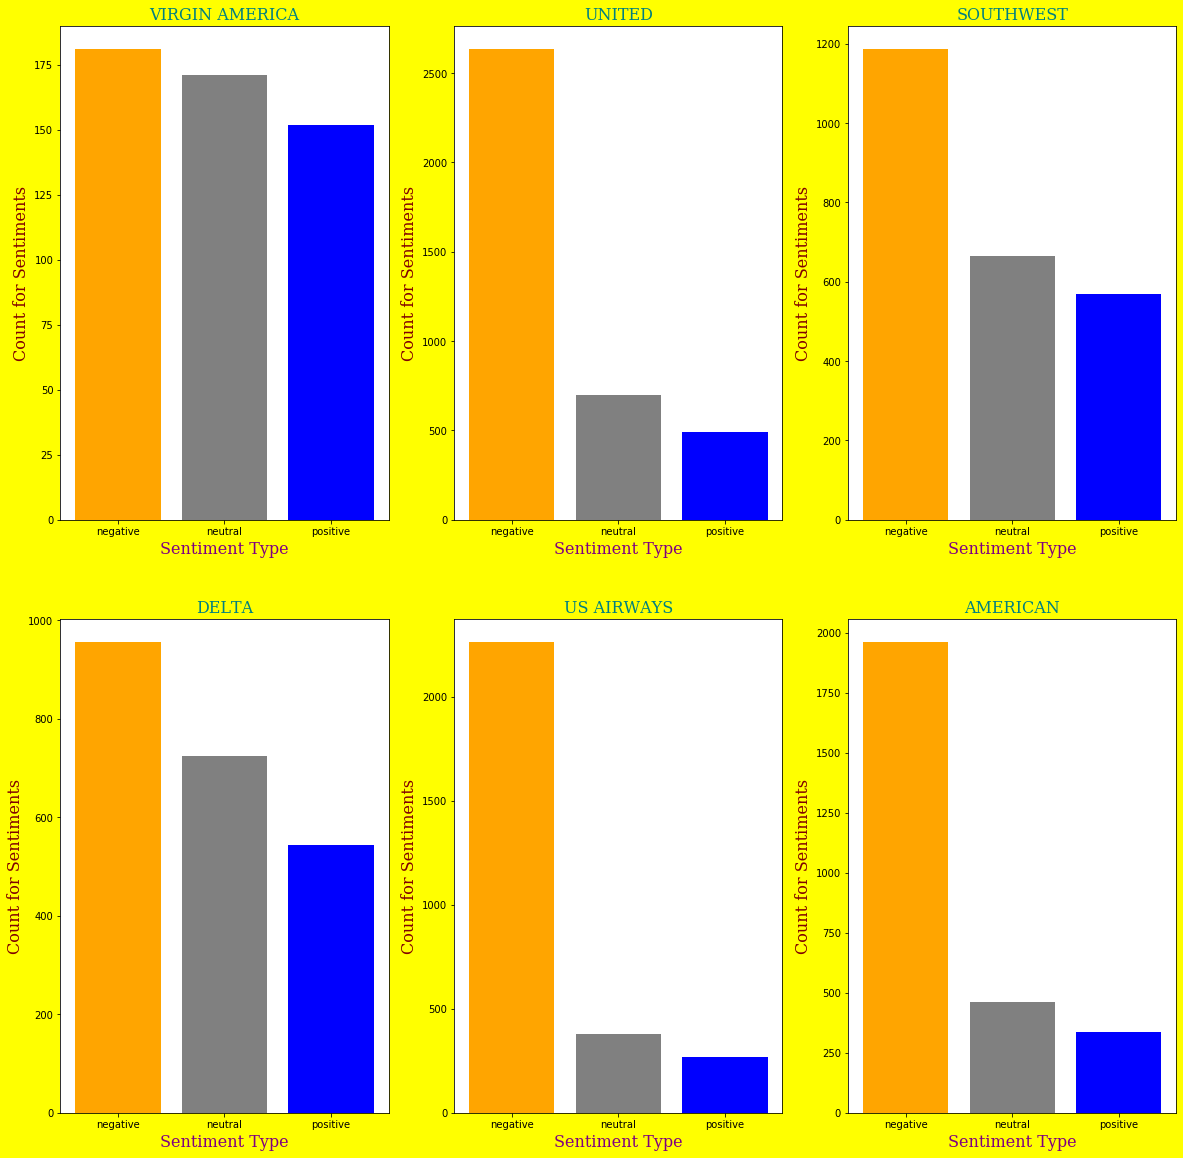

In [15]:
# Plotting the sentiment distribution airline wise
airlines= ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways','American']
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(1,figsize=(20, 20),facecolor='yellow',edgecolor='brown')
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_airline_data_df=airline_data_df[airline_data_df['airline']==i]
    count=new_airline_data_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['orange', 'grey', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Count for Sentiments',color='maroon',fontdict=font)
    plt.xlabel('Sentiment Type', fontdict=font, color='purple')
    plt.title(i.upper(), color='teal',fontdict=font)

## Analysis
-- US Airways, American and United airlines negative reactions.
-- Tweets for Virgin America and Delta are the most balanced.

# Data Pre-Processing

In [16]:
# Changing the case for all the sentiments to lower case
airline_data_df['sentiment_filtered']=airline_data_df['text'].str.lower()

In [17]:
# Removing special characters
airline_data_df['sentiment_filtered']=airline_data_df['sentiment_filtered'].apply(lambda x: x.replace('#',''))

In [18]:
airline_data_df.dtypes

airline_sentiment     object
airline               object
text                  object
sentiment_filtered    object
dtype: object

In [19]:
airline_data_df

,airline_sentiment,airline,text,sentiment_filtered
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,@virginamerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,@virginamerica and it's a really big bad thing...
...,...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...,@americanair thank you we got on a different f...
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...,@americanair leaving over 20 minutes late flig...
14637,neutral,American,@AmericanAir Please bring American Airlines to...,@americanair please bring american airlines to...
14638,negative,American,"@AmericanAir you have my money, you change my ...","@americanair you have my money, you change my ..."


In [20]:
# Converting to Bag of Words or Tokens
def convert_tweets_to_bag_of_words(tweets):
    letters_only = re.sub("[^a-zA-Z]", " ",tweets) 
    words = letters_only.split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [21]:
airline_data_df['clean_tweet_tokens']=airline_data_df['sentiment_filtered'].apply(lambda x: convert_tweets_to_bag_of_words(x))


## Wordcloud 

-- The size of the words appearing in the wordcloud depends on the fequency of that word.

In [22]:
# Remove Stop words
stop_words= set(stopwords.words('english'))

In [45]:
# Words that are occuring frequently but not needed for frequency
ignore_words = set(['americanair','@', 'virginamerica','united','usairways','southwestair','jetblue','http','flight','amp'])

In [46]:
# Combining both the sets
union_ignorewords_stopwords = ignore_words.union(stop_words) 

**Frequently used words in Negative tweets**

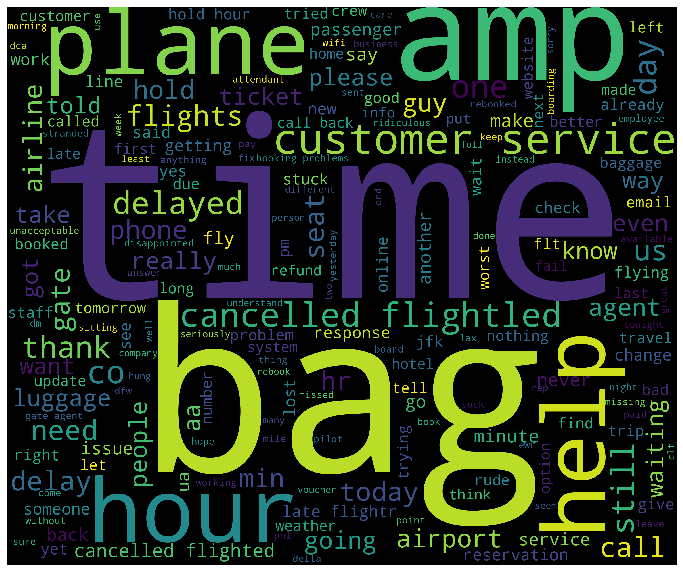

In [27]:
new_airline_data_df=airline_data_df[airline_data_df['airline_sentiment']=='negative']
all_neg_tweets = ' '.join(new_airline_data_df['clean_tweet_tokens'])
tweet_words = all_neg_tweets.split()

selected_words_neg = (word for word in tweet_words if word not in union_ignorewords_stopwords)

final_sentence_neg = ' '.join(selected_words_neg)

wordcloud_neg = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(final_sentence_neg)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

**Frequently used words in Positive tweets**

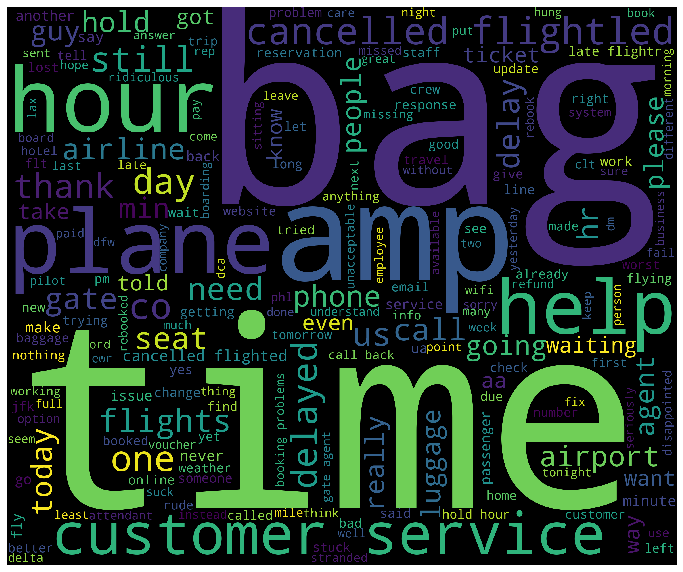

In [28]:
new_airline_data_df=airline_data_df[airline_data_df['airline_sentiment']=='positive']
all_pos_tweets = ' '.join(new_airline_data_df['clean_tweet_tokens'])
tweet_words_pos = all_pos_tweets.split()

selected_words_pos = (word for word in tweet_words if word not in union_ignorewords_stopwords)

final_sentence_pos = ' '.join(selected_words_pos)

wordcloud_pos = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(final_sentence_pos)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

# Frequency

In [29]:
wordlist_neg = final_sentence_neg.split()
wordlist_pos = final_sentence_pos.split()

**Frequency of each Negative word in negative tweet**

In [ ]:
wordfreq_neg = []
# wordfreq_pos = []

for w in wordlist_neg:
    wordfreq_neg.append(wordlist_neg.count(w))

freq_neg = list(zip(wordlist_neg, wordfreq_neg)).sort(reverse=True)
print("Pairs\n", freq_neg[:10])


In [42]:
f = freq_neg.sort(reverse=True)

In [44]:
f

**Frequently used words in Positive tweets**

In [32]:
wordfreq_pos = []

for w in wordlist_pos:
    wordfreq_pos.append(wordlist_pos.count(w))

print("String\n" + final_sentence_pos +"\n")
print("List\n" + str(wordlist_pos) + "\n")
print("Frequencies\n" + str(wordfreq_pos) + "\n")
print("Pairs\n" + str(list(zip(wordlist_pos, wordfreq_pos))))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
airline_data_df

,airline_sentiment,airline,text,sentiment_filtered,clean_tweet_tokens
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,@virginamerica what @dhepburn said.,virginamerica dhepburn said
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,@virginamerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,@virginamerica i didn't today... must mean i n...,virginamerica today must mean need take anothe...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,@virginamerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,@virginamerica and it's a really big bad thing...,virginamerica really big bad thing
...,...,...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...,@americanair thank you we got on a different f...,americanair thank got different flight chicago
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...,@americanair leaving over 20 minutes late flig...,americanair leaving minutes late flight warnin...
14637,neutral,American,@AmericanAir Please bring American Airlines to...,@americanair please bring american airlines to...,americanair please bring american airlines bla...
14638,negative,American,"@AmericanAir you have my money, you change my ...","@americanair you have my money, you change my ...",americanair money change flight answer phones ...


In [34]:
# airline_data_df.to_csv("airline_data_df.csv")

Frequency of each Positive word in positive tweet

 **Removing Punctuations, Numbers, and Special Characters**

In [ ]:
airline_data_df['clean_tweet'] = airline_data_df['sentiment_filtered'].apply(lambda x: x.split())
airline_data_df.head()

In [ ]:
# keyword_count  = airline_data_df['clean_tweet_tokens'].value_counts()
keyword_count = keyword_count[:10,]
plt.figure(figsize=(10,15))
sns.barplot(keyword_count.index, keyword_count.values, alpha=0.8)
plt.title('Top 10 keywords')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('keyword', fontsize=16,fontdict=font)
plt.show()

In [ ]:
keyword_count  = airline_data_df['clean_tweet_tokens'].value_counts()
keyword_count = keyword_count[:10,]
plt.figure(figsize=(20,25))
sns.barplot(keyword_count.index, keyword_count.values, alpha=0.8)
plt.title('Top 10 keywords',fontdict=font,fontsize=19)
plt.ylabel('Number of Occurrences', fontsize=12,fontdict=font)
plt.xlabel('Keyword', fontsize=16,fontdict=font)
plt.show()

In [ ]:
keyword_count_negative  = airline_data_df['clean_tweet_tokens'].value_counts()
keyword_count_neg = keyword_count[:10,]
plt.figure(figsize=(20,25))
sns.barplot(keyword_count.index, keyword_count.values, alpha=0.8)
plt.title('Top 10 keywords',fontdict=font,fontsize=19)
plt.ylabel('Number of Occurrences', fontsize=12,fontdict=font)
plt.xlabel('Keyword', fontsize=16,fontdict=font)
plt.show()

# Building Classification Model

Train:Test split of data i.e 80:20.

    **Algorithms**
    Decision Tree Classifier
    Random Forest Classifier

In [ ]:
train,test = train_test_split(airline_data_df,test_size=0.2,random_state=42)

In [ ]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [ ]:
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))
    cm=confusion_matrix(pred , test['airline_sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()